In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import defaultdict
from tqdm.notebook import tqdm

# np.random.seed(42) 

In [226]:

data = pd.read_csv("data/CATSnDOGS.csv")
labels = pd.read_csv("data/labels.csv")

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4087,V4088,V4089,V4090,V4091,V4092,V4093,V4094,V4095,V4096
0,23,116,227,149,49,131,31,31,86,86,...,59,116,102,78,102,102,116,139,152,166
1,247,247,245,245,245,245,245,235,235,223,...,110,100,100,70,66,70,70,70,70,78
2,77,77,77,87,87,94,94,94,105,87,...,116,125,128,128,128,128,125,125,116,116
3,32,28,28,28,28,28,28,28,28,28,...,73,73,73,79,108,131,148,148,148,131
4,3,44,112,136,120,120,125,122,129,133,...,186,184,181,180,179,173,170,192,119,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,228,232,228,222,224,223,221,222,223,224,...,192,192,197,203,201,192,183,185,190,191
194,245,245,245,244,246,246,247,247,248,248,...,130,131,128,122,114,112,107,107,103,87
195,22,21,24,25,25,26,29,29,31,28,...,11,13,24,33,56,100,110,111,131,152
196,86,79,90,86,82,93,109,119,120,102,...,51,39,36,29,52,36,36,32,36,33


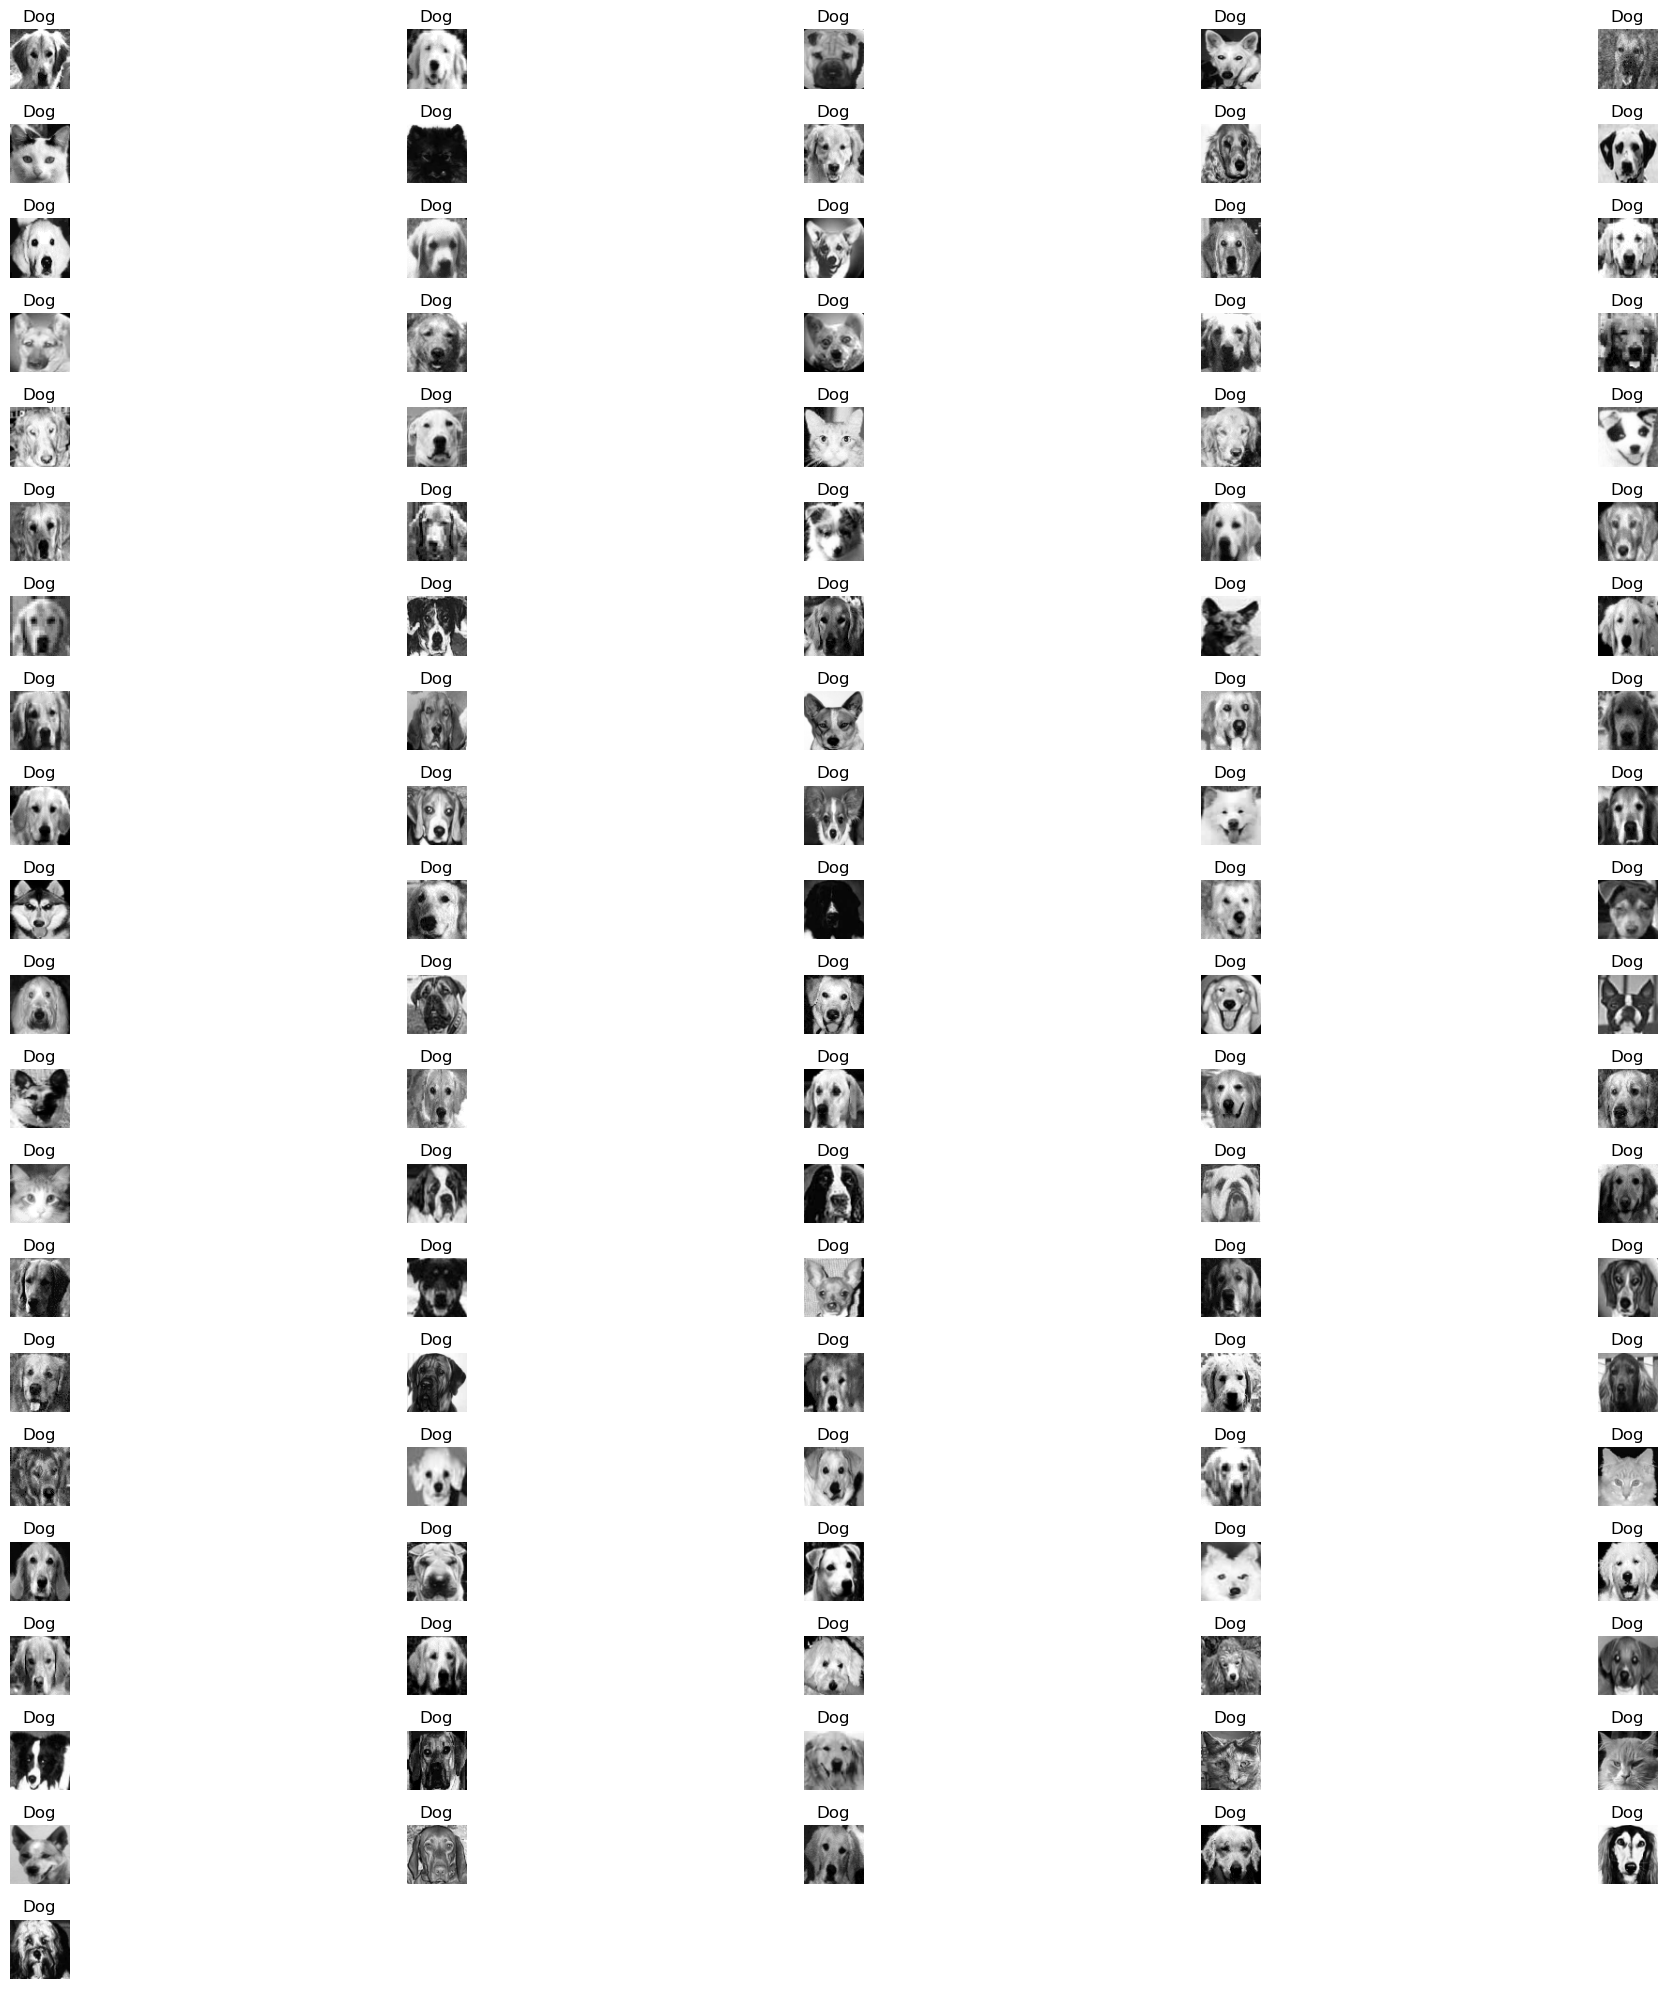

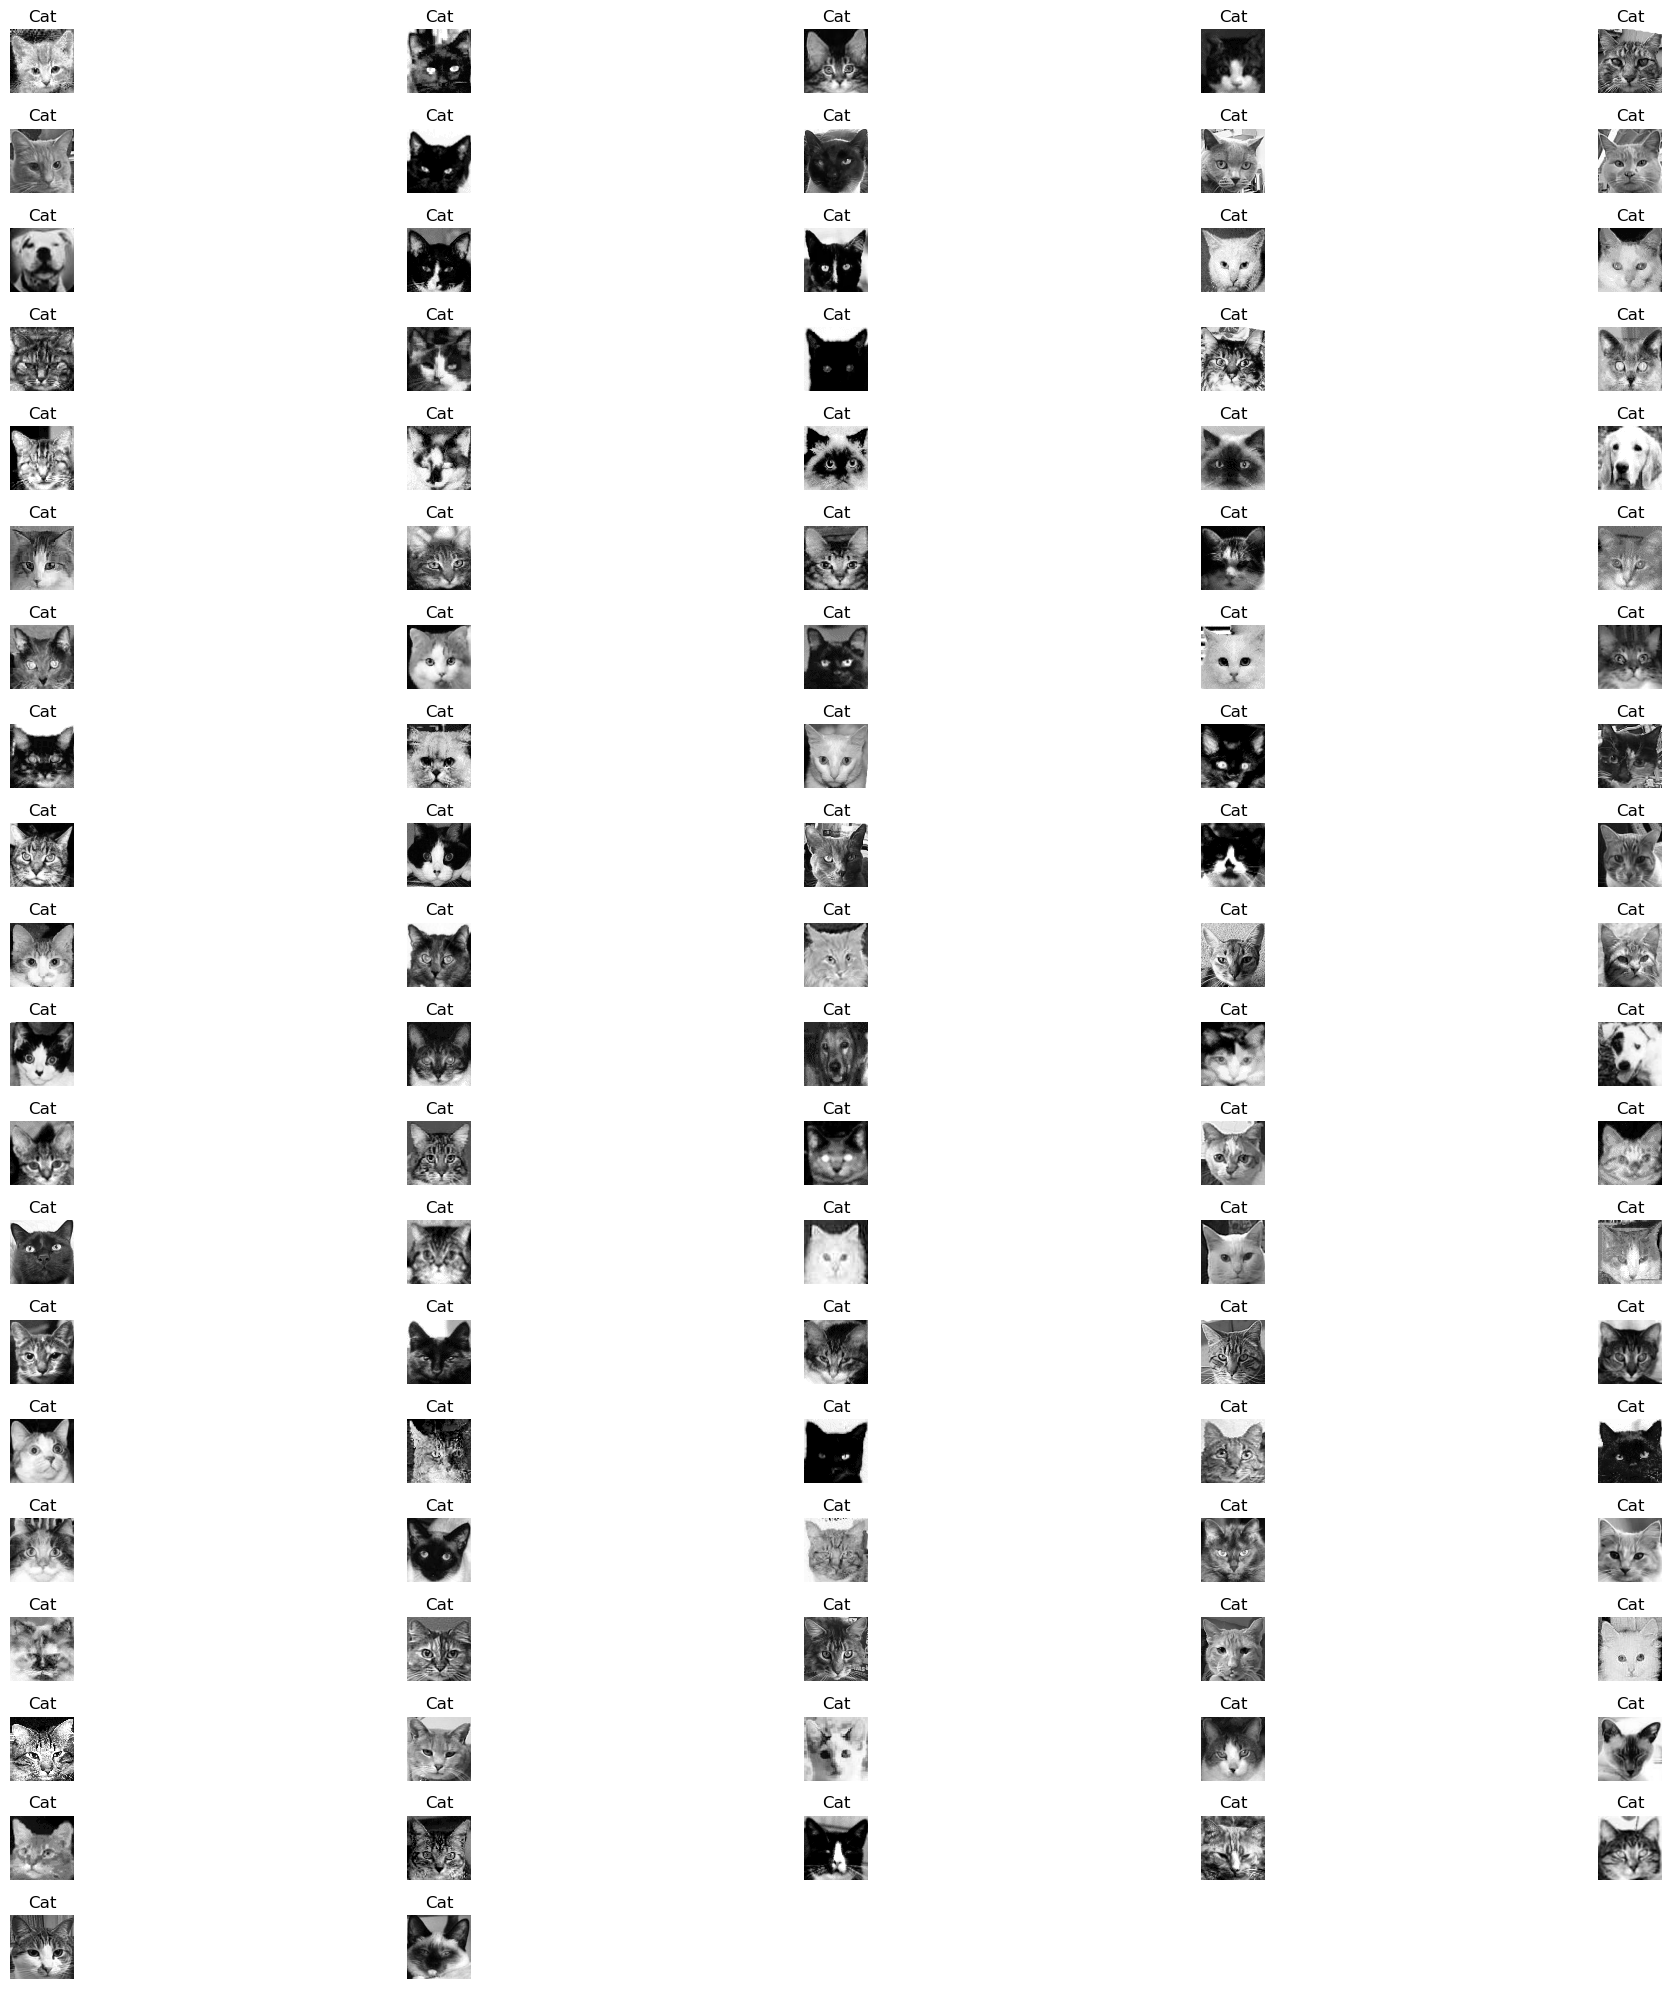

In [257]:
import matplotlib.pyplot as plt
images = data.to_numpy().reshape(-1, 64, 64).transpose(0, 2, 1)
# find all dogs and cats and split into two, then plot every one with the label
dogs = images[labels["x"] == 1]
cats = images[labels["x"] == 0]

# plot all dogs. use the shape of the array to determine how many rows to plot. use 5 columns
# to plot the images
plt.figure(figsize=(20, 20))
for i in range(dogs.shape[0]):
    plt.subplot(dogs.shape[0] // 5 + 1, 5, i + 1)
    plt.imshow(dogs[i], cmap="gray")
    plt.axis("off")
    plt.title("Dog")
plt.tight_layout()



plt.figure(figsize=(20, 20))
for i in range(cats.shape[0]):
    plt.subplot(cats.shape[0] // 5 + 1, 5, i + 1)
    plt.imshow(cats[i], cmap="gray")
    plt.axis("off")
    plt.title("Cat")
plt.tight_layout()

In [246]:

accuracy_forest = []
accuracy_boosting = []
cross_val_scores_forest = []
cross_val_scores_boosting = []


feature_importances_forest = defaultdict(list)
feature_importances_boosting = defaultdict(list)

runs = range(10)

for run in runs:
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

    random_forest = RandomForestClassifier(n_estimators=500, n_jobs=-1)
    cross_val = cross_val_score(random_forest, X_train, y_train.values.ravel(), cv=5, n_jobs=-1)
    cross_val_scores_forest.append(cross_val)
    random_forest.fit(X_train, y_train.values.ravel())

    gradient_boosting = GradientBoostingClassifier(n_estimators=150, max_depth=5)
    cross_val = cross_val_score(gradient_boosting, X_train, y_train.values.ravel(), cv=5, n_jobs=-1)
    cross_val_scores_boosting.append(cross_val)
    gradient_boosting.fit(X_train, y_train.values.ravel())

    feature_importances_boosting[run] = gradient_boosting.feature_importances_
    feature_importances_forest[run] = random_forest.feature_importances_


    print("Random Forest accuracy: ", f1_score(y_test, random_forest.predict(X_test), average=None))
    accuracy_forest.append(f1_score(y_test, random_forest.predict(X_test), average=None))
    print("Gradient Boosting accuracy: ", f1_score(y_test, gradient_boosting.predict(X_test), average=None))
    accuracy_boosting.append(f1_score(y_test, gradient_boosting.predict(X_test), average=None))
    print()
    

    

    

Random Forest accuracy:  [0.73913043 0.64705882]
Gradient Boosting accuracy:  [0.72       0.53333333]

Random Forest accuracy:  [0.71794872 0.73170732]
Gradient Boosting accuracy:  [0.58536585 0.56410256]

Random Forest accuracy:  [0.79166667 0.6875    ]
Gradient Boosting accuracy:  [0.80769231 0.64285714]

Random Forest accuracy:  [0.82608696 0.76470588]
Gradient Boosting accuracy:  [0.65116279 0.59459459]

Random Forest accuracy:  [0.76190476 0.73684211]
Gradient Boosting accuracy:  [0.68421053 0.71428571]

Random Forest accuracy:  [0.82352941 0.86956522]
Gradient Boosting accuracy:  [0.6875     0.79166667]

Random Forest accuracy:  [0.8        0.84444444]
Gradient Boosting accuracy:  [0.62857143 0.71111111]

Random Forest accuracy:  [0.65 0.65]
Gradient Boosting accuracy:  [0.57894737 0.61904762]

Random Forest accuracy:  [0.71794872 0.73170732]
Gradient Boosting accuracy:  [0.58536585 0.56410256]

Random Forest accuracy:  [0.76470588 0.82608696]
Gradient Boosting accuracy:  [0.625 

/var/folders/ym/s4qttynd2r50zpqn0tx9c7w00000gn/T/ipykernel_3142/3787943113.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(["Cats", "Dogs"])
/var/folders/ym/s4qttynd2r50zpqn0tx9c7w00000gn/T/ipykernel_3142/3787943113.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(["Cats", "Dogs"])


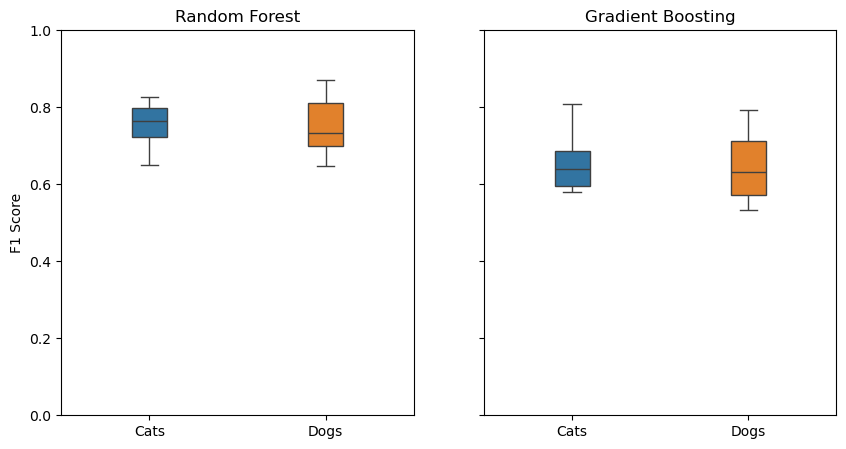

In [247]:
import matplotlib.pyplot as plt

import seaborn as sns



cats_rf = [x[0] for x in accuracy_forest]
dogs_rf= [x[1] for x in accuracy_forest]

cats_gb = [x[0] for x in accuracy_boosting]
dogs_gb = [x[1] for x in accuracy_boosting]


# make a box plot for each classifier for each label

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.boxplot([cats_rf, dogs_rf], ax=ax[0], width=0.2)
ax[0].set_title("Random Forest")
ax[0].set_ylabel("F1 Score")
ax[0].set_xticklabels(["Cats", "Dogs"]) 
ax[0].set_ylim(0, 1)

sns.boxplot([cats_gb, dogs_gb], ax=ax[1], width=0.2)
ax[1].set_title("Gradient Boosting")
ax[1].set_ylabel("F1 Score")
ax[1].set_xticklabels(["Cats", "Dogs"]) 
ax[0].set_ylim(0, 1)

plt.show()





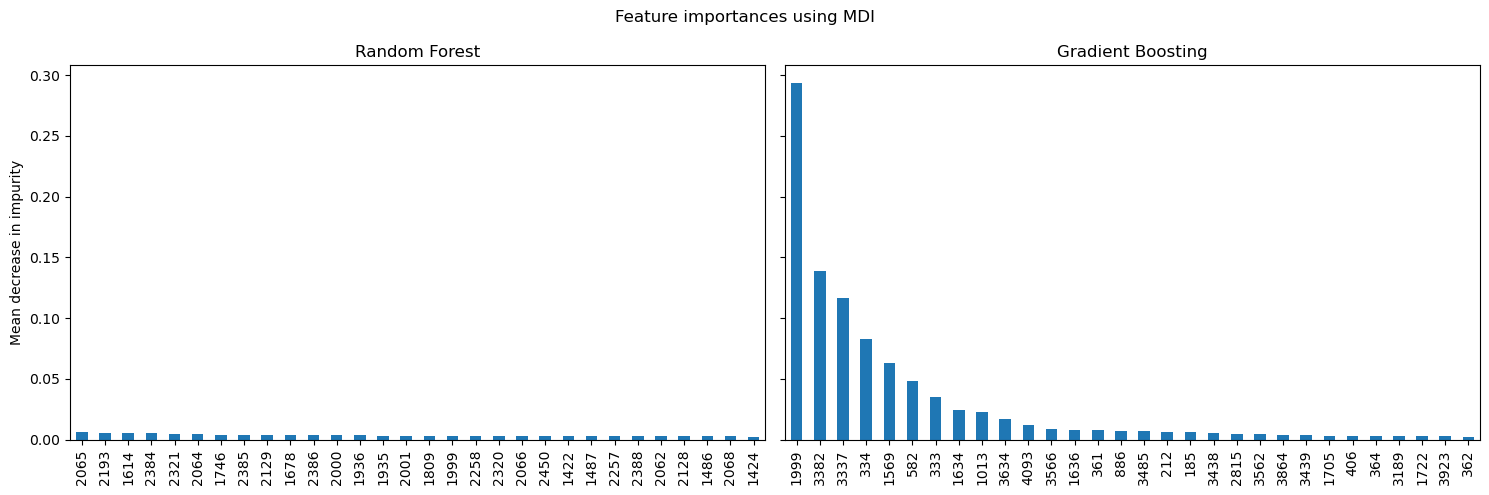

In [250]:
forest_importances = pd.Series(random_forest.feature_importances_)
boost_importances = pd.Series(gradient_boosting.feature_importances_)

# sort importances and stds in descending order
forest_importances = forest_importances.sort_values(ascending=False).head(30)
boost_importances = boost_importances.sort_values(ascending=False).head(30)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# Plot for Random Forest importances
forest_importances.plot(kind='bar', ax=ax1)
ax1.set_title("Random Forest")
ax1.set_ylabel("Mean decrease in impurity")

# Plot for Gradient Boosting importances
boost_importances.plot(kind='bar', ax=ax2)
ax2.set_title("Gradient Boosting")
ax2.set_ylabel("Mean decrease in impurity")

fig.suptitle("Feature importances using MDI")
fig.tight_layout()
plt.show()

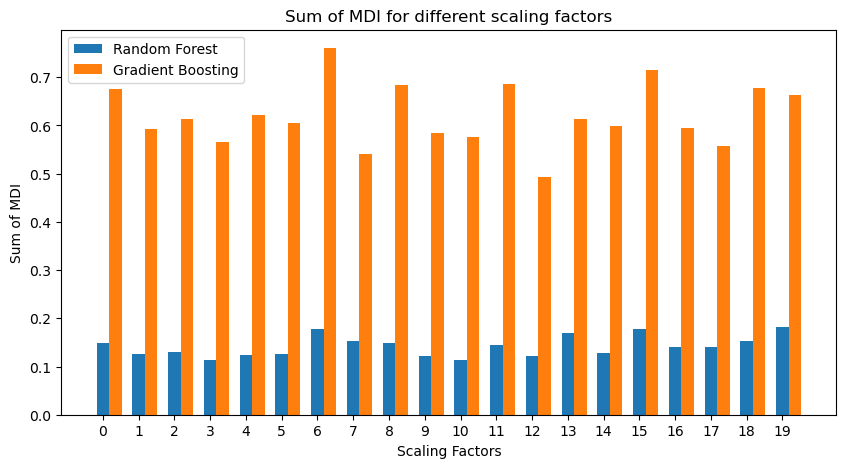

In [37]:
# ÄR SAMMA NUMBER OF FEATURES VIKTIGA?

bar_width = 0.35

bars_forest = []
bars_boosting = []

scaling_factors = runs
for noise in runs:
    forest_importances = pd.Series(feature_importances_forest[noise])
    boost_importances = pd.Series(feature_importances_boosting[noise])

    # sort importances and stds in descending order
    forest_importances = forest_importances.sort_values(ascending=False).head(15)
    boost_importances = boost_importances.sort_values(ascending=False).head(15)

    sum_mdi_boosting = boost_importances.sum()
    sum_mdi_forest = forest_importances.sum()
    
    bars_boosting.append(sum_mdi_boosting)
    bars_forest.append(sum_mdi_forest)

fig, ax = plt.subplots(figsize=(10, 5))
bar1 = ax.bar(np.arange(len(scaling_factors)), bars_forest, bar_width, label='Random Forest')
bar2 = ax.bar(np.arange(len(scaling_factors)) + bar_width, bars_boosting, bar_width, label='Gradient Boosting')

ax.set_xticks(np.arange(len(scaling_factors)))
ax.set_xticklabels(scaling_factors)
ax.set_xlabel('Scaling Factors')
ax.set_ylabel('Sum of MDI')
ax.set_title('Sum of MDI for different scaling factors')
ax.legend()

    
    
    
# SVAR NEJ, 


    
    

    
    
    

Text(0.5, 0.98, 'Overlap of top 30 features between Random Forest and Gradient Boosting')

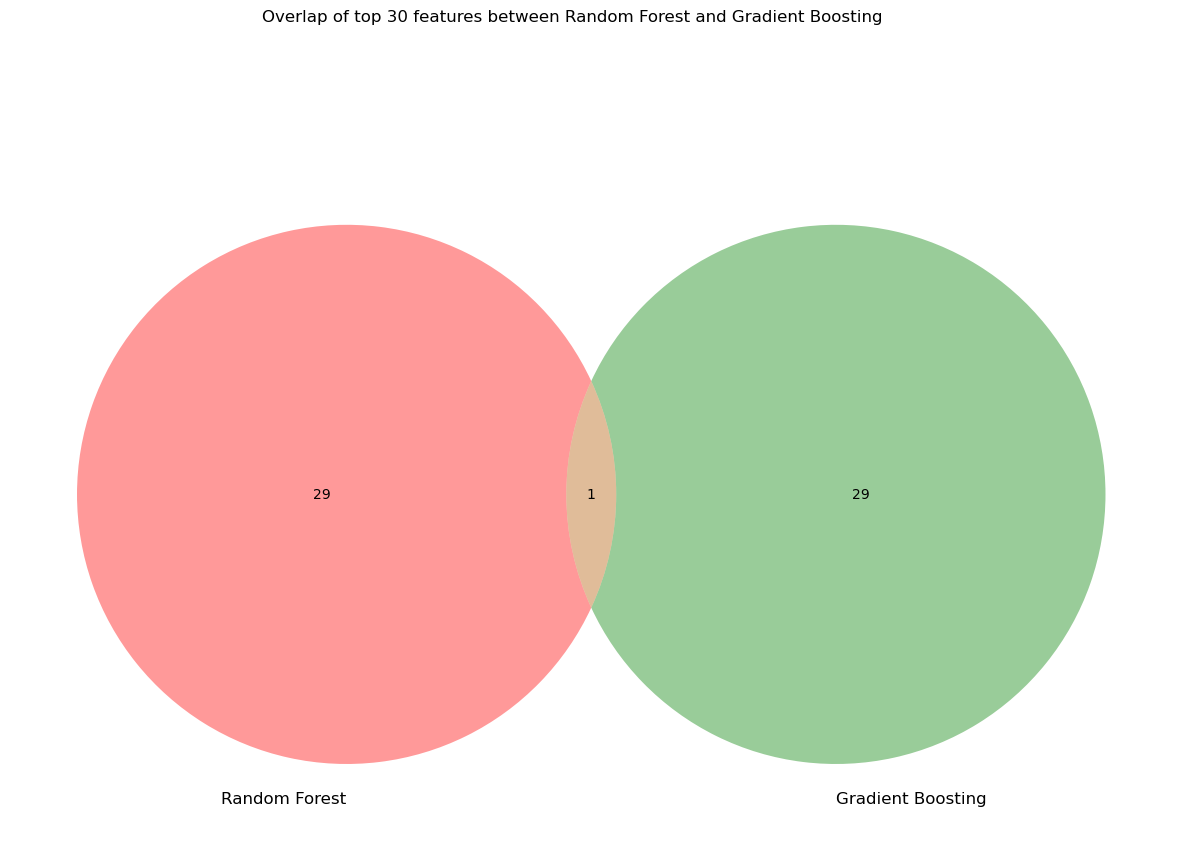

In [253]:
# plot the overlap of features between the two models in a venn diagram  for each noise level

from matplotlib_venn import venn2

fig, ax = plt.subplots(1, 1, figsize=(15, 10))


top_15_forest = random_forest.feature_importances_.argsort()[::-1][:30]
top_15_boosting = gradient_boosting.feature_importances_.argsort()[::-1][:30]
venn2([set(top_15_forest), set(top_15_boosting)], set_labels=('Random Forest', 'Gradient Boosting'), ax=ax)


fig.suptitle("Overlap of top 30 features between Random Forest and Gradient Boosting")


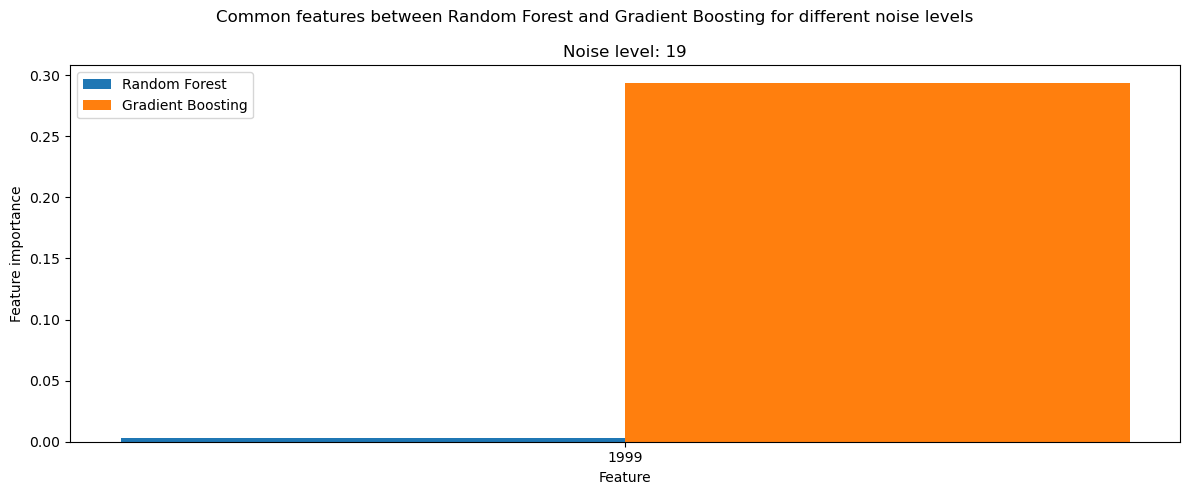

In [254]:
# overlap between features

fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True)
bar_width = 0.35


top_15_forest = random_forest.feature_importances_.argsort()[::-1][:30]
top_15_boosting = gradient_boosting.feature_importances_.argsort()[::-1][:30]
common_features = set(top_15_forest).intersection(set(top_15_boosting))
common_features = list(common_features)
common_importances_forest = random_forest.feature_importances_[common_features]
common_importances_boosting = gradient_boosting.feature_importances_[common_features]
common_features = [str(f) for f in common_features]


# Adjust the positions of the bars
bar1_positions = np.arange(len(common_features))
bar2_positions = [x + bar_width for x in bar1_positions]

ax.bar(bar1_positions, common_importances_forest, width=bar_width, label='Random Forest')
ax.bar(bar2_positions, common_importances_boosting, width=bar_width, label='Gradient Boosting')

ax.set_title(f"Noise level: {noise}")
ax.set_xlabel("Feature")
ax.set_ylabel("Feature importance")
ax.set_xticks([r + bar_width / 2 for r in range(len(common_features))])
ax.set_xticklabels(common_features)
ax.legend()

fig.suptitle("Common features between Random Forest and Gradient Boosting for different noise levels")
fig.tight_layout()









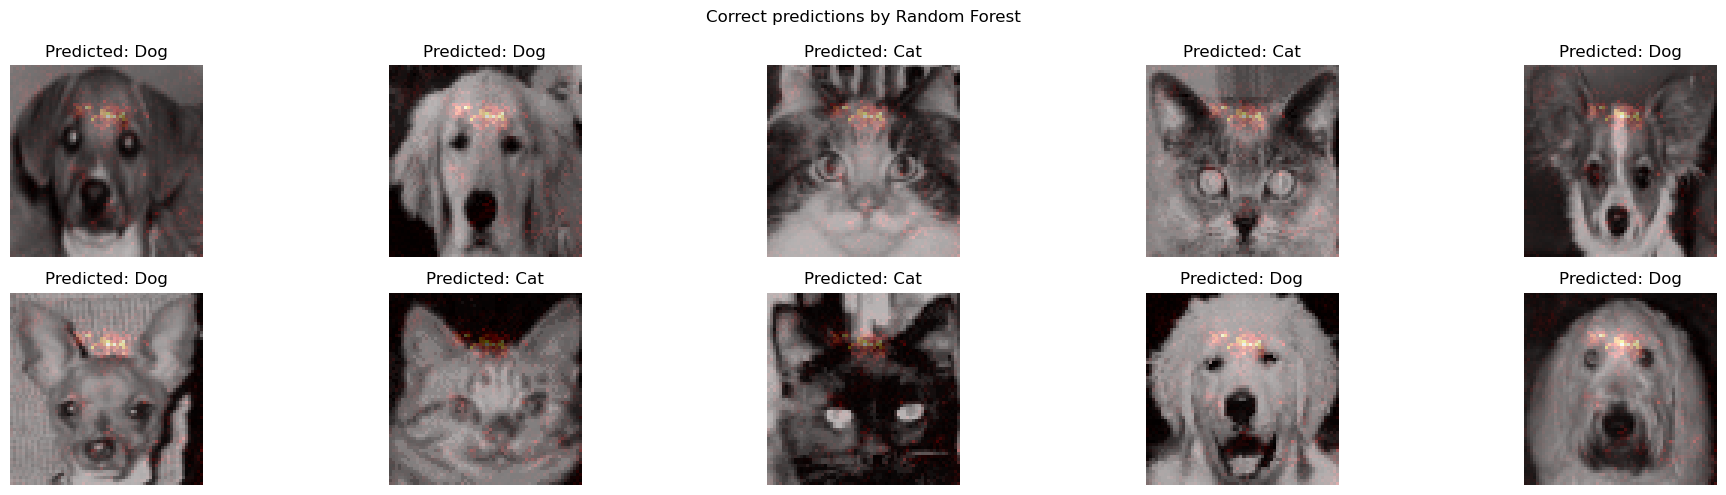

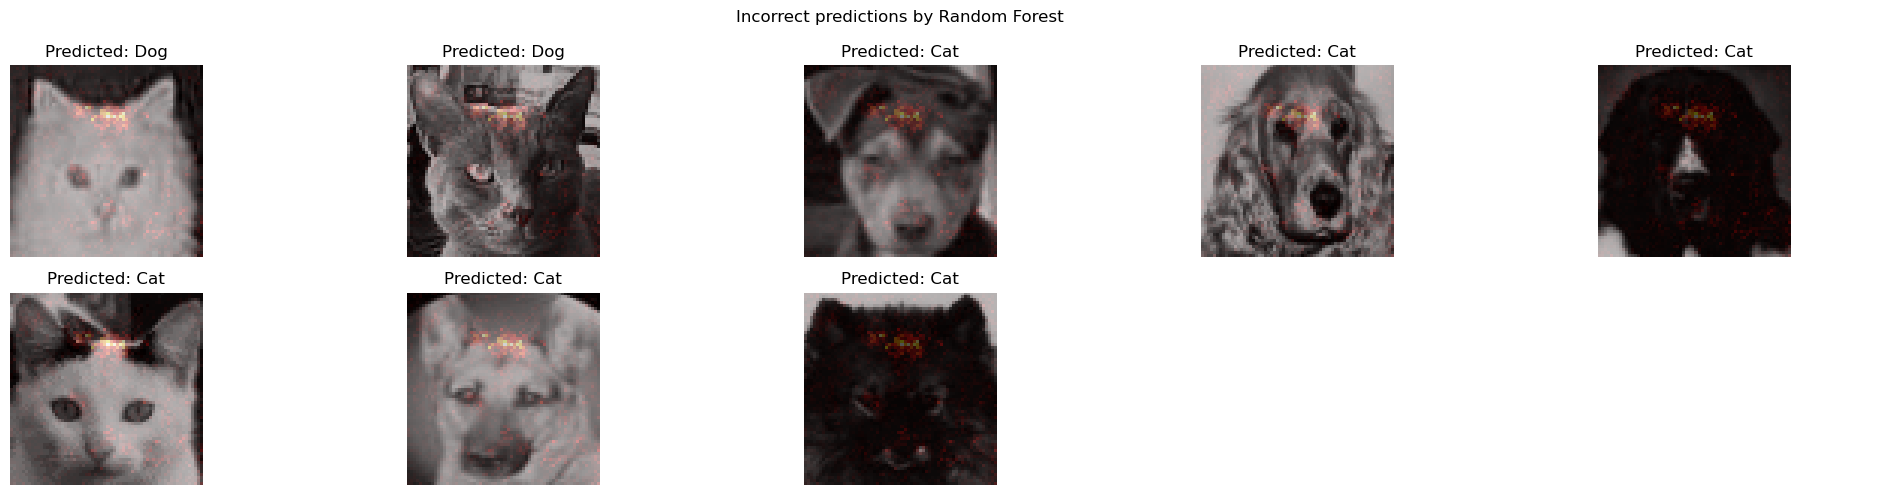

In [300]:


images = data.values.reshape(-1, 64, 64).transpose(0, 2, 1)


cat_dog_map = {0: "Cat", 1: "Dog"}

feature_importances_rf = random_forest.feature_importances_.reshape(-1, 64, 64).transpose(0, 2, 1)

# plot correctly classified images for random forest, first classify
correctly_classified = random_forest.predict(X_test) == y_test.values.ravel()

X_test_transformed = X_test.values.reshape(-1, 64, 64).transpose(0, 2, 1)


feature_importances = random_forest.feature_importances_.reshape(-1, 64, 64).transpose(0, 2, 1)

predictions = random_forest.predict(X_test)

correctly_classified = predictions == y_test.values.ravel()
incorrectly_classified = ~correctly_classified

correct_classified_labels = y_test.values.ravel()[correctly_classified]
incorrectly_classified_labels = y_test.values.ravel()[incorrectly_classified]
incorrectly_classified_labels = 1 - incorrectly_classified_labels

correctly_classified_images = X_test_transformed[correctly_classified]
incorrectly_classified_images = X_test_transformed[incorrectly_classified]


# plot the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(20, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(correctly_classified_images[i], cmap='gray')
    ax.imshow(feature_importances[0], cmap='hot', alpha=0.3)
    ax.set_title(f"Predicted: {cat_dog_map[correct_classified_labels[i]]}")
    
    ax.axis('off')
fig.suptitle("Correct predictions by Random Forest")
fig.tight_layout()


fig, axes = plt.subplots(2, 5, figsize=(20, 5))
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(incorrectly_classified_images[i], cmap='gray')
        ax.imshow(feature_importances[0], cmap='hot', alpha=0.3)
        ax.set_title(f"Predicted: {cat_dog_map[incorrectly_classified_labels[i]]}")
        ax.axis('off')
    except IndexError:
        # plot nothing if there are no more images
        ax.axis('off')

fig.suptitle("Incorrect predictions by Random Forest")
fig.tight_layout()
    


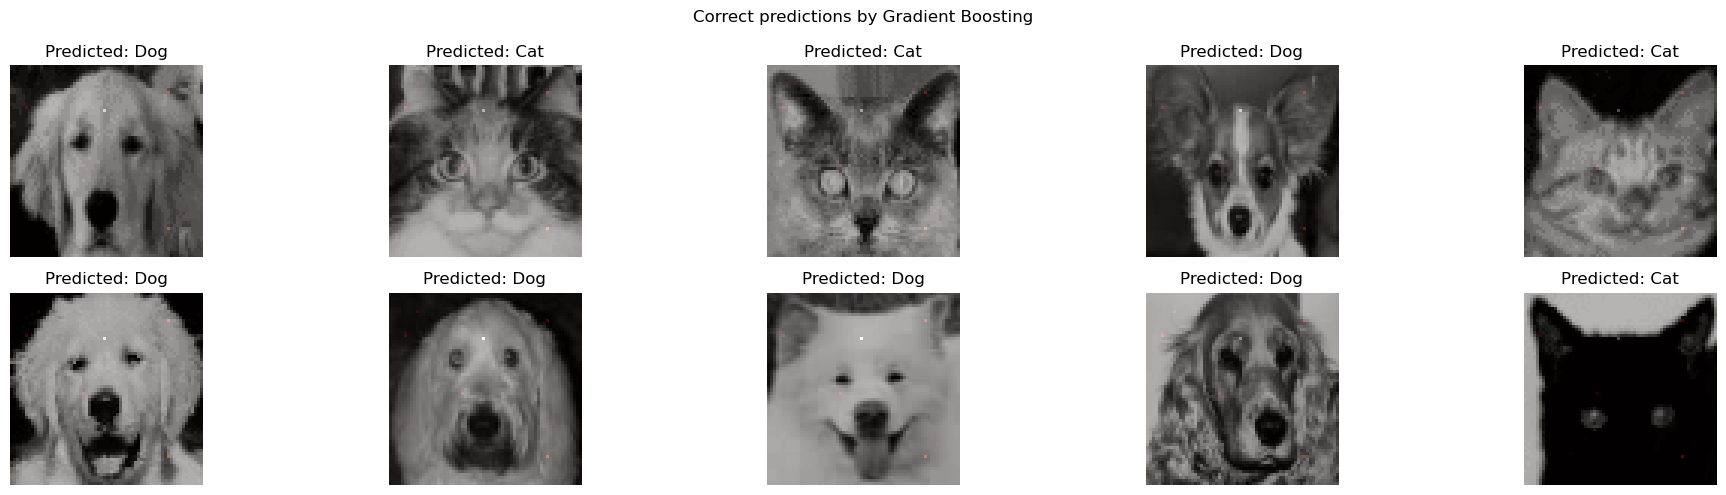

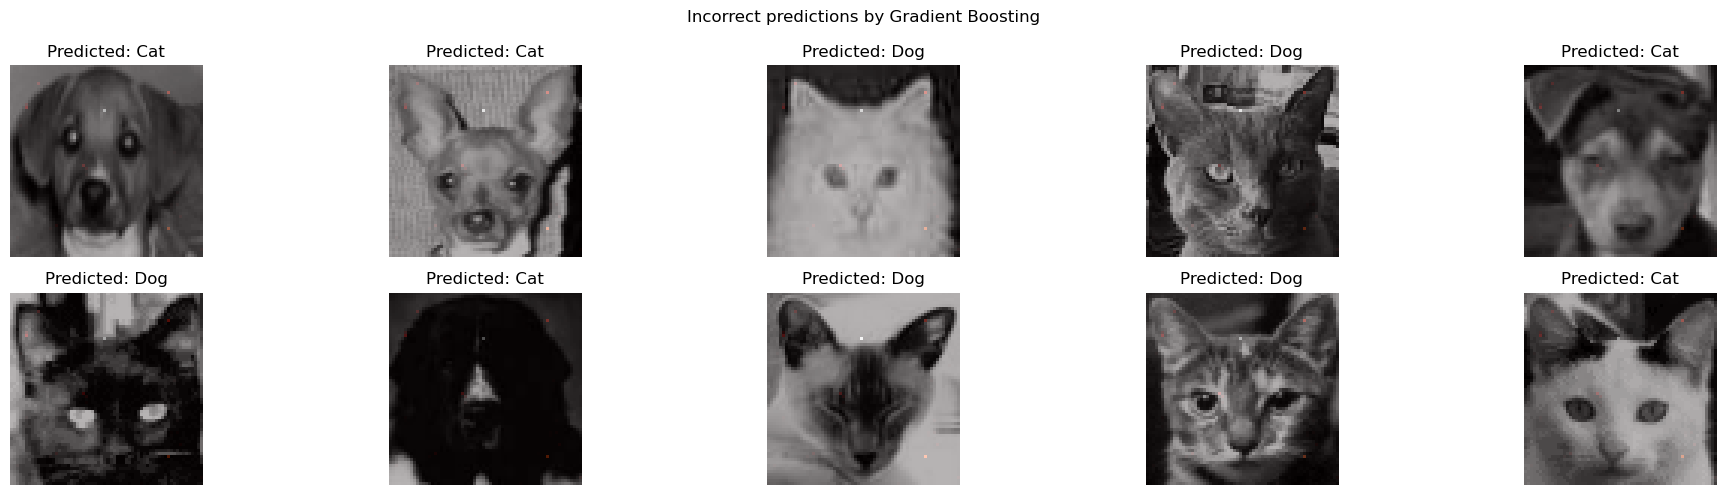

In [301]:
#### gradient boosting

feature_importances = gradient_boosting.feature_importances_.reshape(-1, 64, 64).transpose(0, 2, 1)

predictions = gradient_boosting.predict(X_test)

correctly_classified = predictions == y_test.values.ravel()
incorrectly_classified = ~correctly_classified

correct_classified_labels = y_test.values.ravel()[correctly_classified]
incorrectly_classified_labels = y_test.values.ravel()[incorrectly_classified]
incorrectly_classified_labels = 1 - incorrectly_classified_labels

correctly_classified_images = X_test_transformed[correctly_classified]
incorrectly_classified_images = X_test_transformed[incorrectly_classified]


# plot the first 10 images
fig, axes = plt.subplots(2, 5, figsize=(20, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(correctly_classified_images[i], cmap='gray')
    ax.imshow(feature_importances[0], cmap='hot', alpha=0.3)
    ax.set_title(f"Predicted: {cat_dog_map[correct_classified_labels[i]]}")
    
    ax.axis('off')
fig.suptitle("Correct predictions by Gradient Boosting")
fig.tight_layout()


fig, axes = plt.subplots(2, 5, figsize=(20, 5))
for i, ax in enumerate(axes.flat):
    try:
        ax.imshow(incorrectly_classified_images[i], cmap='gray')
        ax.imshow(feature_importances[0], cmap='hot', alpha=0.3)
        ax.set_title(f"Predicted: {cat_dog_map[incorrectly_classified_labels[i]]}")
        ax.axis('off')
    except IndexError:
        # plot nothing if there are no more images
        ax.axis('off')

fig.suptitle("Incorrect predictions by Gradient Boosting")
fig.tight_layout()